# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [5]:
pokemon.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

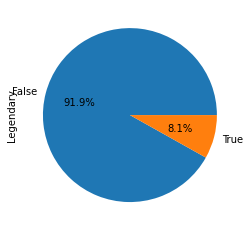

In [14]:
pokemon["Legendary"].value_counts().plot.pie(autopct="%.1f%%");

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [15]:
meanNo = pokemon.loc[pokemon['Legendary'] == False, 'Total'].mean()
stdNo = pokemon.loc[pokemon['Legendary'] == False, 'Total'].std()
NoLeg = pokemon.loc[pokemon['Legendary'] == False, 'Total']
Leg = pokemon.loc[pokemon['Legendary'] == True, 'Total']
meanL = pokemon.loc[pokemon['Legendary'] == True, 'Total'].mean()
stdL = pokemon.loc[pokemon['Legendary'] == True, 'Total'].std()
        
print(meanNo, stdNo, meanL, stdL)


417.21360544217686 106.76041745713005 637.3846153846154 60.93738905315344


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [23]:
# Your code here:
import numpy as np
from scipy import stats
N= len(pokemon["Legendary"])
s = (stdNo + stdL)/2
t = (meanNo - meanL)/(s*np.sqrt(2/N))
print(t)
df = 2*N - 2
p = 2*(1 - stats.t.cdf(t,df=df))
p

-52.51613351995447


2.0

What do you conclude from this test? Write your conclusions below.

In [24]:
checkPValue = lambda p,threshold=0.05: "--> Null(H0) hypotesis rejected" if p < threshold else "--> We cannot reject the null hypotesis"
t2, p2 = stats.ttest_ind(NoLeg,Leg)
print(t2,p2)
print(f"t={t2} p={p2}")
checkPValue(p2)

-16.386116965872425 3.0952457469652825e-52
t=-16.386116965872425 p=3.0952457469652825e-52


'--> Null(H0) hypotesis rejected'

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

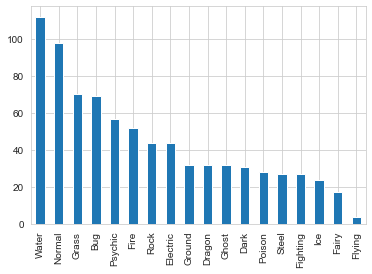

In [37]:
data=pokemon["Type 1"].value_counts()
data.plot(kind='bar');

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [39]:
meanWat = pokemon.loc[pokemon['Type 1'] == "Water"].mean()
stdWat = pokemon.loc[pokemon['Type 1'] == "Water"].std()

meanNot = pokemon.loc[pokemon['Type 1'] != "Water"].mean()
stdNot = pokemon.loc[pokemon['Type 1'] != "Water"].std()

#print(meanWat,stdWat,meanNot, stdNot)

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [40]:
# Your code here:
Water = pokemon.loc[pokemon['Type 1'] == "Water", "Total"]
NoWater = pokemon.loc[pokemon['Type 1'] != "Water", "Total"]
t, p= stats.ttest_ind(Water, NoWater)
print(t,p)
print(f"t={t} p={p}")
checkPValue(p)


-0.4418547448849676 0.6587140317488793
t=-0.4418547448849676 p=0.6587140317488793


'--> We cannot reject the null hypotesis'

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [41]:
# Your code here:
t, p = stats.ttest_rel(pokemon["Attack"],pokemon["Defense"])
print(t,p)
print(f"t={t} p={p}")
checkPValue(p)

4.325566393330478 1.7140303479358558e-05
t=4.325566393330478 p=1.7140303479358558e-05


'--> Null(H0) hypotesis rejected'

Describe the results of the test in the cell below.

In [42]:
#There are statistically significant diferences between the attack and the defense
#therefore the attack and the defense are not equal

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [43]:
t, p = stats.ttest_rel(pokemon["Sp. Atk"],pokemon["Sp. Def"])
print(t,p)
print(f"t={t} p={p}")
checkPValue(p)

0.853986188453353 0.3933685997548122
t=0.853986188453353 p=0.3933685997548122


'--> We cannot reject the null hypotesis'

Describe the results of the test in the cell below.

In [44]:

#There are not statistically significant diferences between the sp.attack and sp. defense
#therefore the attack and the defense are similar


As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [45]:
meanAttack = pokemon[['Attack']].mean()
meanDefense = pokemon[['Defense']].mean()
a = stats.ttest_1samp(pokemon["Attack"],meanDefense, nan_policy="omit")
print(a)
checkPValue(a.pvalue)

Ttest_1sampResult(statistic=Defense    4.495481
dtype: float64, pvalue=array([7.96795083e-06]))


'--> Null(H0) hypotesis rejected'

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [17]:
# Your code here:



Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [18]:
# Your code here:



Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:

